In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

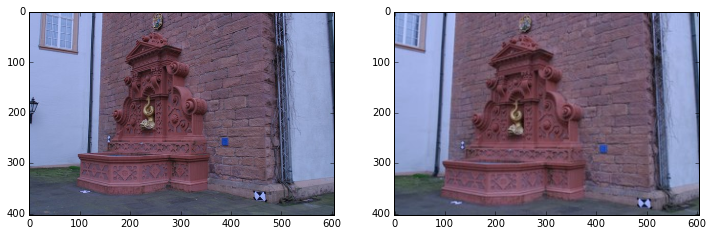

In [28]:
img1 = cv2.imread('C:/TEMP/com61.jpg')[:, :, ::-1]
img2 = cv2.imread('C:/TEMP/com62.jpg')[:, :, ::-1]

img2 = cv2.resize(img2, img1.shape[:2][::-1])
#img1 = cv2.resize(img1, img2.shape[:2][::-1])

f, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(img1)
ax[1].imshow(img2)

plt.show()

In [29]:
 # params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )
 
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
 
# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
old_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(img1)

In [26]:
img2

array([[[129, 158, 214],
        [131, 160, 216],
        [135, 164, 220],
        ..., 
        [156, 173, 220],
        [155, 171, 219],
        [154, 170, 219]],

       [[129, 158, 215],
        [131, 160, 216],
        [135, 164, 220],
        ..., 
        [157, 174, 220],
        [155, 172, 220],
        [154, 170, 219]],

       [[131, 159, 215],
        [132, 161, 217],
        [135, 164, 220],
        ..., 
        [157, 174, 221],
        [156, 172, 221],
        [156, 172, 221]],

       ..., 
       [[ 78,  89, 106],
        [ 77,  89, 105],
        [ 76,  88, 104],
        ..., 
        [ 81,  93, 107],
        [ 80,  92, 106],
        [ 80,  92, 106]],

       [[ 76,  88, 105],
        [ 76,  88, 104],
        [ 75,  87, 103],
        ..., 
        [ 78,  90, 104],
        [ 78,  90, 104],
        [ 77,  89, 103]],

       [[ 76,  88, 104],
        [ 76,  88, 103],
        [ 75,  87, 103],
        ..., 
        [ 77,  89, 103],
        [ 76,  88, 102],
        [ 76,  88,

In [27]:
img1

array([[[161, 177, 229],
        [161, 177, 229],
        [161, 177, 229],
        ..., 
        [139, 160, 203],
        [140, 159, 201],
        [140, 159, 201]],

       [[161, 177, 229],
        [161, 177, 229],
        [161, 177, 229],
        ..., 
        [139, 160, 203],
        [141, 160, 202],
        [140, 159, 201]],

       [[161, 177, 229],
        [161, 177, 229],
        [161, 177, 229],
        ..., 
        [140, 161, 204],
        [142, 161, 204],
        [141, 160, 203]],

       ..., 
       [[ 71,  78, 104],
        [ 72,  79, 105],
        [ 72,  79, 105],
        ..., 
        [ 72,  81,  96],
        [ 73,  80,  96],
        [ 72,  82,  94]],

       [[ 70,  77, 105],
        [ 70,  77, 105],
        [ 71,  78, 106],
        ..., 
        [ 70,  77,  93],
        [ 70,  77,  93],
        [ 70,  77,  93]],

       [[ 67,  74, 102],
        [ 68,  75, 103],
        [ 70,  77, 105],
        ..., 
        [ 68,  75,  91],
        [ 68,  75,  91],
        [ 68,  75,

In [33]:
img3 = img1.copy()

In [34]:
new_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# calculate optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, new_gray, p0, None, **lk_params)

# Select good points
good_new = p1[st==1]
good_old = p0[st==1]

# draw the tracks
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
    cv2.circle(img2, (a, b), 5, color[i].tolist(), -1)
    cv2.circle(img3, (c, d), 5, color[i].tolist(), -1)


In [24]:
good_new.shape

(2L, 2L)

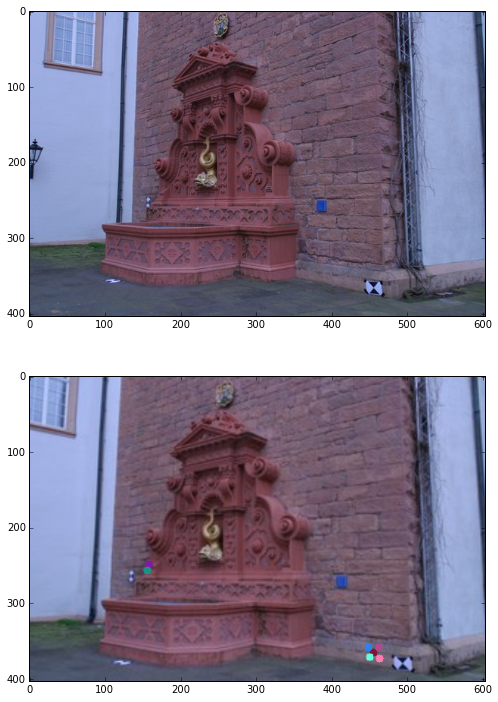

In [31]:
f, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].imshow(img1)
ax[1].imshow(img2)

plt.show()

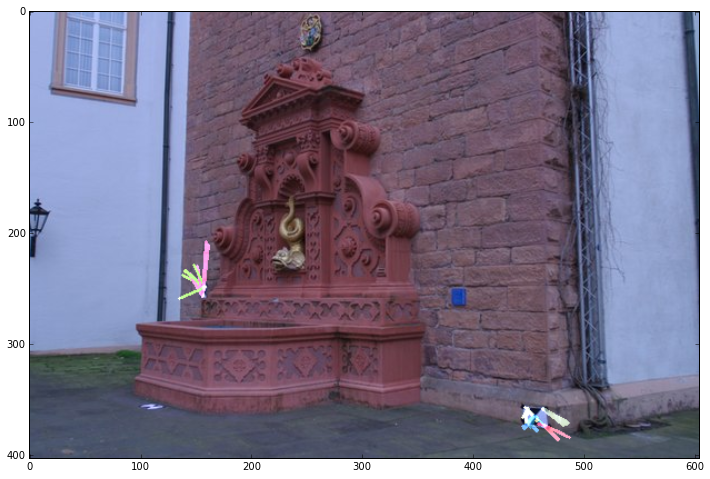

In [16]:
plt.figure(figsize=(12, 9))
plt.imshow(cv2.add(img1, mask))
plt.show()

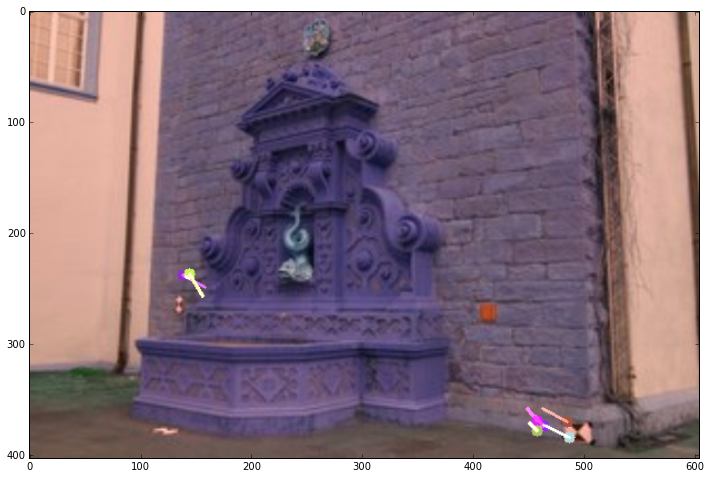

In [15]:
plt.figure(figsize=(12, 9))
plt.imshow(cv2.add(img2, mask))
plt.show()

In [35]:
plt.figure(figsize=(10, 7))
plt.imshow(frame)
plt.show()

NameError: name 'frame' is not defined